## Imports

In [5]:
import cv2
from PIL import Image, ImageEnhance, ImageFilter
from PIL.ImageOps import invert
import torch

## Image preprocessing

In [9]:
test_image = 'test_image.jpg'

# convert to grayscale
img = Image.open(test_image).convert('L')

# invert image
img = invert(img)

# increase contrast of image
img = ImageEnhance.Contrast(img).enhance(2)

# make all pixels below 200 black
img = img.point(lambda p: p > 220 and 255)

# smoothen image
img = img.filter(ImageFilter.SMOOTH)

# show image
img.show()


## Inference

Using cache found in /home/tim/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-28 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 212 layers, 20909508 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


[         xmin         ymin        xmax         ymax  confidence  class  \
0  434.871277  1307.555420  569.192749  1401.229004    0.956473     13   
1  611.121033   754.038879  696.333618   992.091675    0.930205     12   
2  205.832428  1033.671265  310.442261  1154.876587    0.928128      4   
3  593.892212   500.304474  708.587158   666.869446    0.895378     13   
4  359.590332   351.532410  471.762939   449.783752    0.847059     14   
5  195.901581   611.758972  318.067780   784.135986    0.806754      6   
6  622.283081  1122.369507  717.749023  1228.273804    0.764354      9   

            name  
0       resistor  
1       inductor  
2       curr_src  
3       resistor  
4      voltmeter  
5  dc_volt_src_2  
6          diode  ]


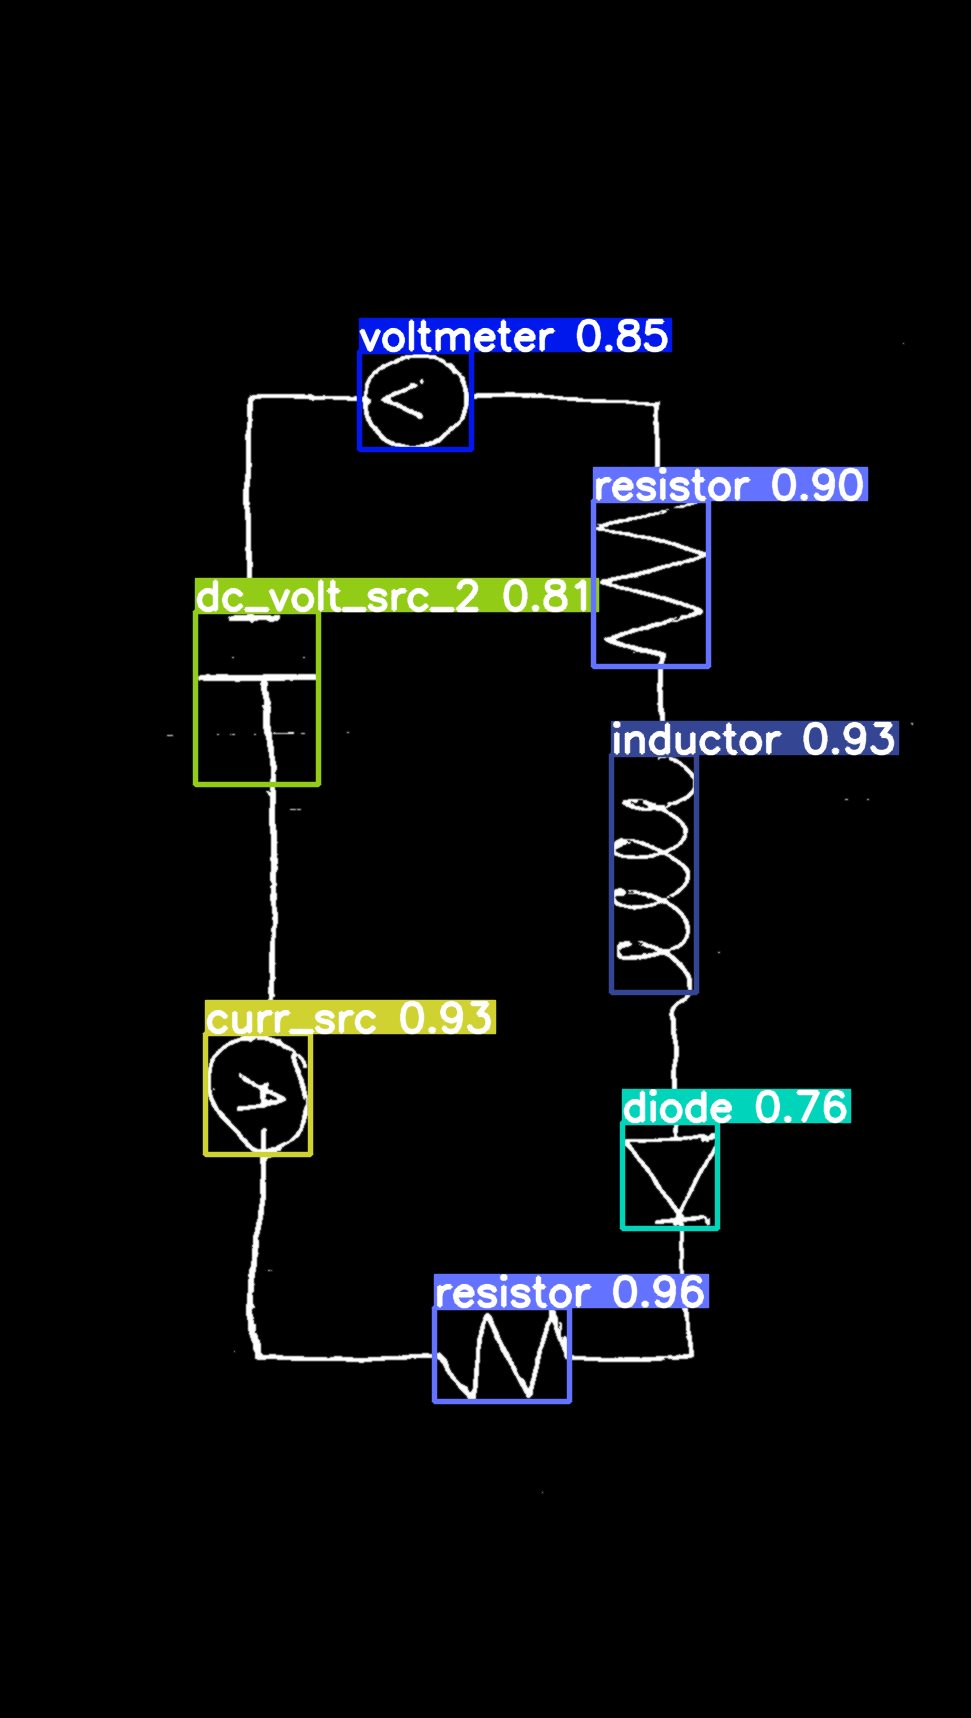

In [10]:
# model path
model_path = 'best.pt'

# load model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)
model.eval()

# get results
results = model(img)

# print results
print(results.pandas().xyxy)

# show results
results.show()

# save image
results.save('test_image_result.jpg')

Saved 1 image to runs/detect/exp


## Line detection

In [54]:
import numpy as np
# Remove pixels in bounding boxing from image
def remove_pixels(image, results):
    # get bounding boxes
    boxes = results.xyxy[0]

    # convert image to numpy array
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # remove pixels in bounding boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box[0:4])  # Convert coordinates to integers
        image[y1:y2, x1:x2] = 0

    # convert image back to PIL image
    image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    return image

# remove pixels in bounding boxes
image = remove_pixels(img, results)

# # show image
# image.show()

In [55]:
# Run line detection on image
import cv2

# another_image = 'road_image.jpg'

# # load image
# image = Image.open(another_image)

# convert image to numpy array
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find edges in image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# find lines in image
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=10, minLineLength=50, maxLineGap=10)

print(len(lines))

# draw lines on image
for points in lines:
    x1, y1, x2, y2 = points[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# convert image back to PIL image
image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# show image
image.show()

13
